# Part 1:

1) Give 1 real world example for:
   - Binary Classification Task
   - Multiclass Classification Task
   - Regression Task

Answer: 
- Diagnosing a disease (yes or no)
- Classifying types of fruits
- Predicting house prices

2)
Classifying into 2 classes, a model produces the following outputs:


| $y_i$     |               $\hat{y_i}$                                  |
|---------|----------------------------------------------------------|
| 1       | 0.9 |
| 1       | 0.4 |
| 0       | 0.3 |
| 0       | 0.6 |

Calculate the binary cross-entropy loss.  
Answer: 0.5736


3) While improving a model complexity, if you notice that a model's training error is decreasing but the test error is getting higher, what does this indicate about the model's behavior?

Answer: overfitting

4. Suppose we have a dataset with categorical targets $Y = ${$1, ..., K$}. 

Let $n_k$ be the size of the $k$-th category :

$$
n_k = \sum_{i=1}^{n} \mathbb{I}[y_i = k], \quad \sum_{k=1}^{K} n_k = n.
$$

Consider a dummy model which always predicts category $l$, $1<l<K$. What is the value of the error rate ? For which $l$
 it is minimal?  

---
Answer: 
$$
Error rate = (errors amount)\div{(objects amount)}
$$
If the model always predicts class l, then errors occur in all cases, the real class is not equal to l.
That is, errors will be on all objects belonging to other classes (k != l).
$$
n_k = n - n_l
$$
Then error rate will be
$$
E(l) = \frac{n - n_l}{n} = \frac{n}{n} - \frac{n_l}{n} = 1 - \frac{n_l}{n}
$$

The minimum error is achieved by always predicting the most frequent class.
$$
n_l = n_{most frequent}
$$
Minimum error is
$$
E(l) = 1 - \frac{n_{most frequent}}{n}
$$


5. The MSE for a constant model $f_\theta(x_i) = c$ is given by : 

$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - c)^2.
$$

Find the constant $c$ that minimizes the MSE.  

---
Answer: I think constant should be equal to mean 
$$
c = \frac{\sum_{i=1}^{n} y}{n}
$$

# Part 2:

### Step 1 : Generate synthetic data (Y) following any type of distributions.


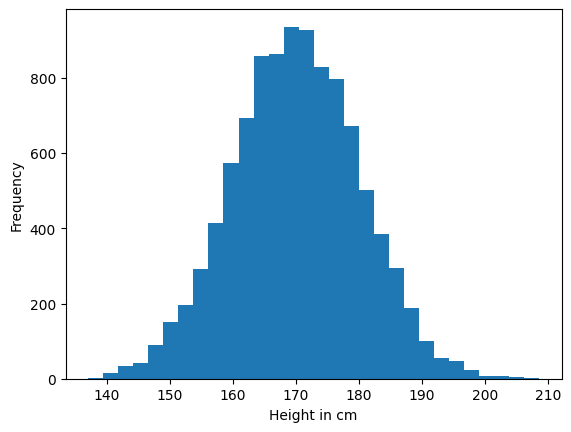

In [1]:
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 100
np.random.seed(RANDOM_SEED)

mean = 170
std = 10
sample_size = 10 ** 4

heights = np.random.normal(loc=mean, scale=std, size=sample_size)

plt.hist(heights, bins=30)
plt.xlabel("Height in cm")
plt.ylabel("Frequency")
plt.show()

### Step 2 : Define a function to compute MSE


In [2]:
def mean_square_err(y_true, y_pred):
    n = len(y_true)
    mse = 0
    for i in range(n):
        mse += (y_true[i] - y_pred[i]) ** 2
    mse /= n
    return mse

### Step 3 : Find the optimal c, compare it to the mean of you synthetic dataset


In [3]:
optimal_c = heights.mean()
optimal_c

np.float64(170.0115094483261)

### Step 4 : Plot the MSE curve and the optimal c

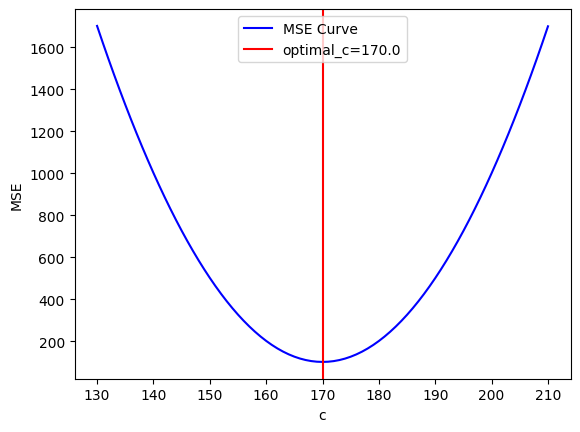

In [4]:
c_values = np.arange(170 - 40, 170 + 41)
mse_values = [mean_square_err(heights, np.full(heights.shape, c)) for c in c_values]

plt.plot(c_values, mse_values, color='b', label='MSE Curve')
plt.axvline(x=optimal_c, color='r', label=f"optimal_c={optimal_c.round()}")
plt.xlabel('c')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Part 3 : 

Write your own implementation of splitting the dataset on train and test using shuffling:

In [5]:
def train_test_split(X, y, test_size=0.2):
    """
    Split the dataset into training and testing sets.

    Parameters:
    X (numpy array): The feature matrix.
    y (numpy array): The target labels.
    test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    X_train (numpy array): The training feature matrix.
    X_test (numpy array): The testing feature matrix.
    y_train (numpy array): The training labels.
    y_test (numpy array): The testing labels.
    """

    X = np.array(X)
    y = np.array(y)
    samples = X.shape[0]

    indices = np.arange(samples)

    np.random.shuffle(indices)

    test_num = int(samples * test_size)

    test_indices = indices[:test_num]
    train_indices = indices[test_num:]

    X_train = np.array([X[i] for i in train_indices])
    X_test = np.array([X[i] for i in test_indices])
    y_train = np.array([y[i] for i in train_indices])
    y_test = np.array([y[i] for i in test_indices])

    return X_train, X_test, y_train, y_test


# Example Usage
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [0, 1, 0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train, X_test, y_train, y_test, sep='\n\n')


[[1 2]
 [3 4]
 [7 8]]

[[5 6]]

[0 1 1]

[0]


Run the following tests to ensure that your implementation works as expected. <br>
<strong>Don't modify the cells</strong>!

In [6]:
def test_basic_split():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the correct number of samples is in the train and test sets
    assert len(X_train) == 3, f"Expected 3 training samples, got {len(X_train)}"
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    assert len(y_train) == 3, f"Expected 3 training labels, got {len(y_train)}"
    assert len(y_test) == 1, f"Expected 1 test label, got {len(y_test)}"
    
    print("Basic split test passed.")

In [7]:
def test_empty_dataset():
    X = []
    y = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the splits are empty
    assert len(X_train) == 0, f"Expected 0 training samples, got {len(X_train)}"
    assert len(X_test) == 0, f"Expected 0 test samples, got {len(X_test)}"
    assert len(y_train) == 0, f"Expected 0 training labels, got {len(y_train)}"
    assert len(y_test) == 0, f"Expected 0 test labels, got {len(y_test)}"
    
    print("Empty dataset test passed.")

In [8]:
def test_different_test_size():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    # Test with 50% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    assert len(X_test) == 2, f"Expected 2 test samples, got {len(X_test)}"
    
    # Test with 25% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    
    print("Different test_size values test passed.")

In [9]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

def test_real_dataset():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Check the size of the train and test sets
    assert len(X_train) == 105, f"Expected 105 training samples, got {len(X_train)}"
    assert len(X_test) == 45, f"Expected 45 test samples, got {len(X_test)}"
    
    print("Real dataset test passed.")


In [10]:
def run_tests():
    test_basic_split()
    test_empty_dataset()
    test_different_test_size()
    test_real_dataset()

run_tests()

Basic split test passed.
Empty dataset test passed.
Different test_size values test passed.
Real dataset test passed.
